In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

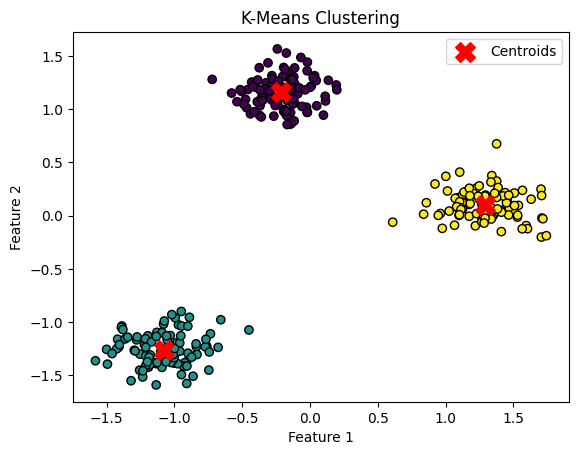

In [40]:

# Step 1: Generate sample data
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Predict cluster labels
labels = kmeans.predict(X_scaled)

# Step 5: Plot results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


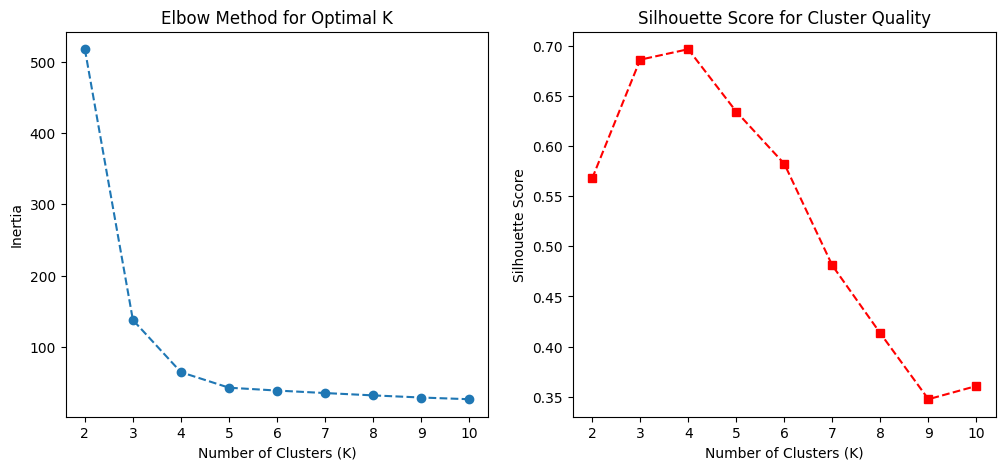

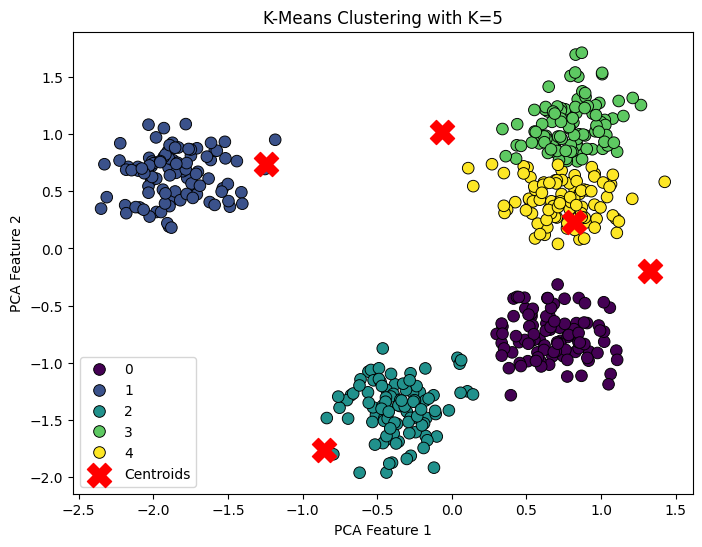

Optimal K selected: 5
Final Silhouette Score: 0.6345


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Generate sample data
X, y_true = make_blobs(n_samples=500, centers=5, random_state=42, cluster_std=1.2)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Checking clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Cluster Quality')

plt.show()

# Step 4: Apply KMeans with the best K (choosing 5 manually based on Elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

# Step 5: PCA for visualization (if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', edgecolor='k', s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label="Centroids")
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()

# Step 7: Print final metrics
print(f"Optimal K selected: {optimal_k}")
print(f"Final Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")


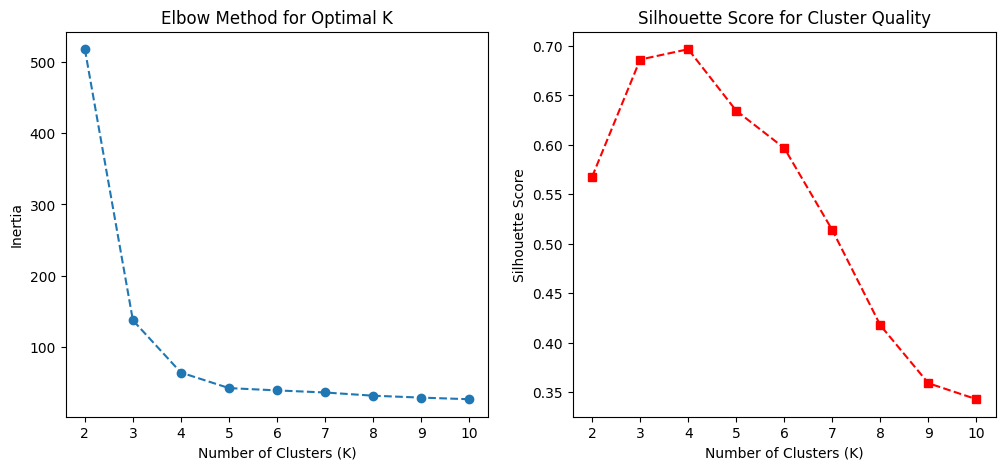

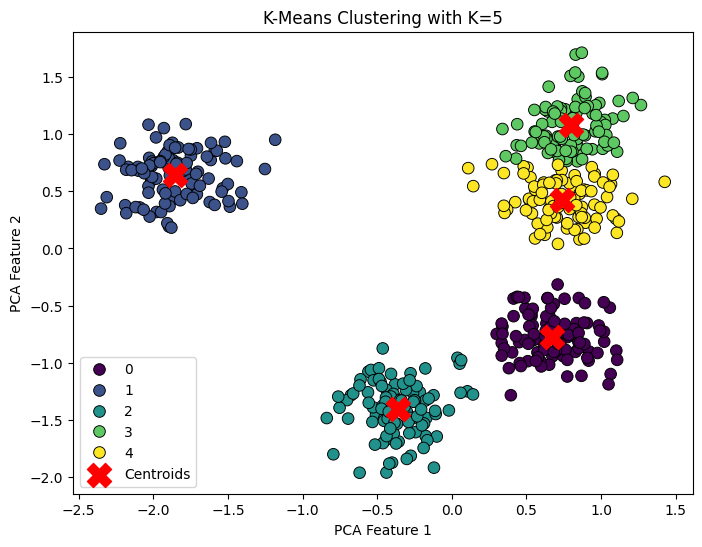

Optimal K selected: 5
Final Silhouette Score: 0.6345


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Generate sample data
X, y_true = make_blobs(n_samples=500, centers=5, random_state=42, cluster_std=1.2)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Checking clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Cluster Quality')

plt.show()

# Step 4: Apply KMeans with the best K (choosing 5 manually based on Elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

# Step 5: PCA for visualization (if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)  # Correctly transforming cluster centers

# Step 6: Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', edgecolor='k', s=70)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=300, c='red', marker='X', label="Centroids")
plt.title(f"K-Means Clustering with K={optimal_k}")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()

# Step 7: Print final metrics
print(f"Optimal K selected: {optimal_k}")
print(f"Final Silhouette Score: {silhouette_score(X_scaled, labels):.4f}")


In [43]:
import os
images = [f'../input/{image}' for image in os.listdir("../input/")]
images

['../input/jetplane.tif',
 '../input/lena_color_256.tif',
 '../input/woman_blonde.tif',
 '../input/house.tif',
 '../input/lena_gray_256.tif',
 '../input/cameraman.tif',
 '../input/pirate.tif',
 '../input/woman_darkhair.tif',
 '../input/peppers_color.tif',
 '../input/peppers_gray.tif',
 '../input/livingroom.tif',
 '../input/lena_gray_512.tif',
 '../input/walkbridge.tif',
 '../input/mandril_color.tif',
 '../input/lake.tif',
 '../input/lena_color_512.tif',
 '../input/mandril_gray.tif']

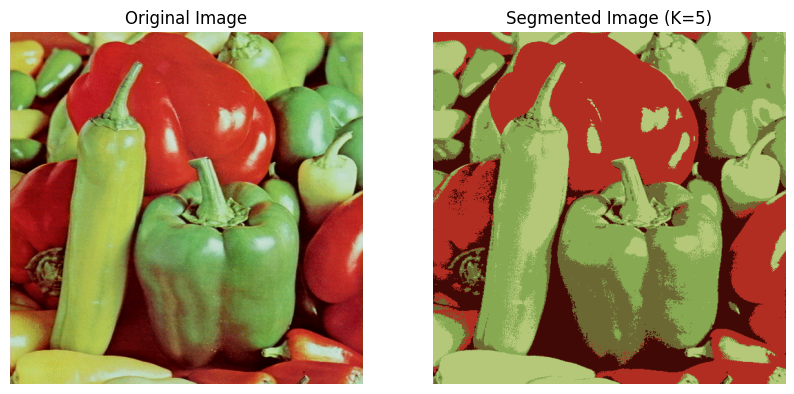

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

# Load the image
image_path = '../input/peppers_color.tif'  # Change to your image file
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV loads as BGR)

# Get image dimensions
height, width, _ = image.shape

# Reshape the image into a 2D array of pixels (rows: pixels, columns: RGB values)
pixels = image.reshape(-1, 3)


# Normalize pixel values
pixels = pixels / 255.0  # Scale between 0 and 1 (Optional but helps with stability)

# Apply K-Means clustering for segmentation
k = 5  # Number of clusters (Adjust based on complexity of the image)
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(pixels)

# Replace each pixel with its cluster's centroid color
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
# segmented_pixels = (segmented_pixels * 255).astype(np.uint8)  # Rescale to 0-255

# Reshape the 1D array back to the original image shape
segmented_image = segmented_pixels.reshape(height, width, 3)

# Display Original vs. Segmented Image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image (K={k})")
plt.axis("off")

plt.show()


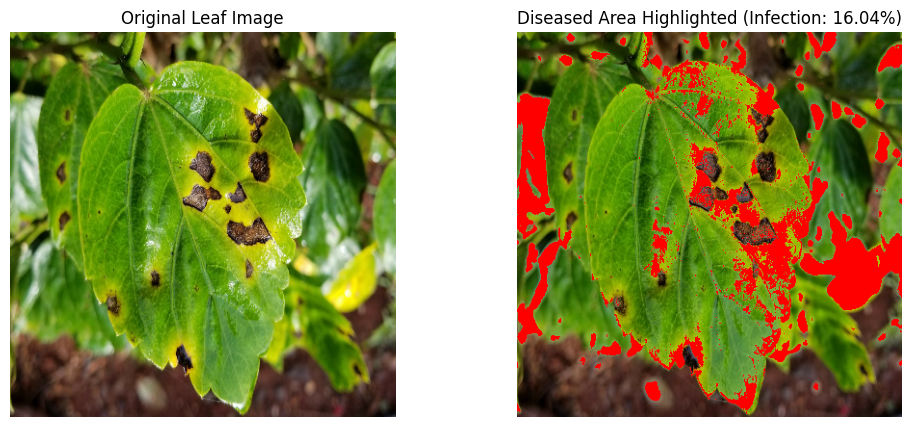

Estimated Infection Percentage: 16.04%


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

# Load the leaf image (Replace 'leaf.jpg' with your actual image file)
image_path = "../input/image.png"  # Update this with your leaf image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert OpenCV BGR to RGB

# Resize for consistency
image = cv2.resize(image, (400, 400))

# Get dimensions
height, width, _ = image.shape

# Reshape image to a 2D array (each row is a pixel)
pixels = image.reshape(-1, 3)

# Apply K-Means clustering
k = 3  # Choose K based on the number of color segments expected
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(pixels)

# Get cluster labels
labels = kmeans.labels_.reshape(height, width)

# Identify the diseased region (Assumption: The cluster with the most **brown/yellow shades** is diseased)
cluster_means = kmeans.cluster_centers_  # Get RGB cluster centers

# Find the cluster that represents the disease (typically darker or unusual color)
disease_cluster = np.argmax(np.linalg.norm(cluster_means - [139, 69, 19], axis=1))  # Brownish cluster

# Create a mask for the diseased region
disease_mask = (labels == disease_cluster).astype(np.uint8)

# Compute the percentage of infected area
infected_pixels = np.sum(disease_mask)
total_pixels = height * width
infection_percentage = (infected_pixels / total_pixels) * 100

# Highlight diseased area in red
highlighted_image = image.copy()
highlighted_image[disease_mask == 1] = [255, 0, 0]  # Red for infection

# Display results
plt.figure(figsize=(12, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Leaf Image")
plt.axis("off")

# Segmented Diseased Image
plt.subplot(1, 2, 2)
plt.imshow(highlighted_image)
plt.title(f"Diseased Area Highlighted (Infection: {infection_percentage:.2f}%)")
plt.axis("off")

plt.show()

# Print infection percentage
print(f"Estimated Infection Percentage: {infection_percentage:.2f}%")


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


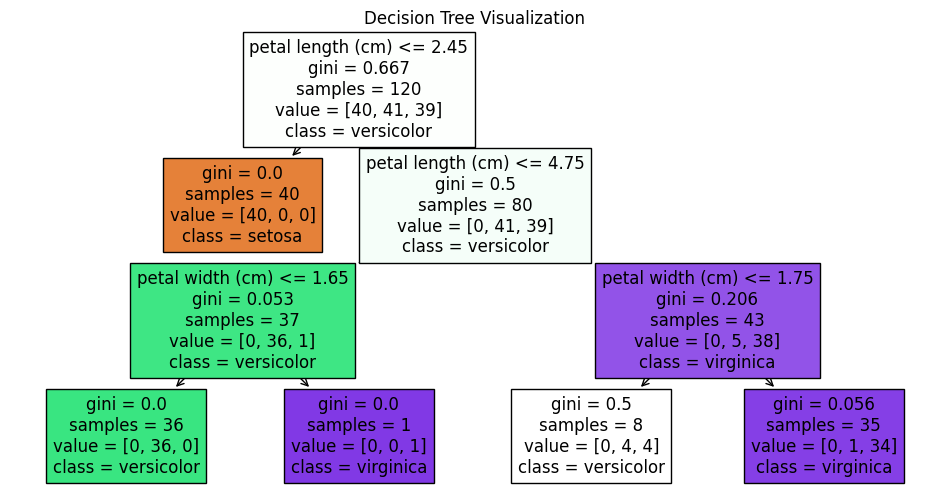

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target  # Features and target labels

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For saving/loading models
import graphviz  # For better visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target  # Features and target labels

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}\n")

# Train best model on full training set
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

# Feature Importance
feature_importances = best_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(data.feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Save model
joblib.dump(best_model, 'decision_tree_model.pkl')
print("\nModel saved as 'decision_tree_model.pkl'")

# Load model
loaded_model = joblib.load('decision_tree_model.pkl')

# Visualizing the Decision Tree using Graphviz
dot_data = export_graphviz(
    best_model, out_file=None, 
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True, rounded=True, special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves visualization as a file

# Matplotlib Visualization
plt.figure(figsize=(14,8))
plot_tree(best_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree Visualization")
plt.show()
